# Importing Module and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing text-cleaning module
import neattext.functions as nfx

In [3]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [4]:
df=pd.read_csv("emotion_dataset.csv")


In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
#cheaking for the null value in the dataset
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

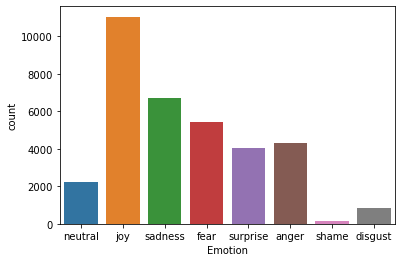

In [8]:
# Plot
sns.countplot(x='Emotion',data=df)

# Data Exploitation

In [9]:
#sentimental analysis
from textblob import TextBlob

In [10]:
def get_sentimental(text):
    blob=TextBlob(text)
    sentimental=blob.sentiment.polarity
    if sentimental>0:
        result="Positive"
    elif sentimental<0:
        result="Negative"
    else:
        result="Neutral"
    return result

In [11]:
get_sentimental("I am Happy")

'Positive'

In [12]:
df['Sentiment']=df['Text'].apply(get_sentimental)
df.head

<bound method NDFrame.head of         Emotion                                               Text Sentiment
0       neutral                                             Why ?    Neutral
1           joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3           joy   Such an eye ! The true hazel eye-and so brill...  Positive
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral
...         ...                                                ...       ...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...  Positive
34788       joy  The world didnt give it to me..so the world MO...  Positive
34789     anger                           A man robbed me today .    Neutral
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   Neutral
34791   sadness  I think about you baby, and I dream about you ...   Neutral

[34792 rows x 3 columns]>

In [13]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

C:\Users\krisn\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


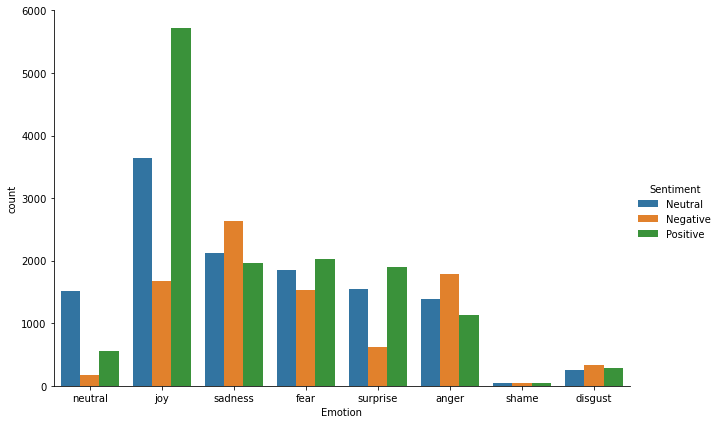

In [14]:
sns.catplot(x="Emotion",hue="Sentiment",data=df,kind="count",size=6,aspect=1.5)

# Text Cleaning

Remove Noice,stop words,punctuation,emojies

In [15]:
#key word extration
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [17]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [18]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,?
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,A man robbed me today .,man robbed today .
34790,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [19]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,Positive,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,Neutral,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Neutral,"Youu JEALOUSY, #Losing YOU..."


# Creating The Model

In [20]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [44]:
#vectorization
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)


In [45]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=43)

### Naïve Bayes

In [23]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [24]:
nv_model.score(x_test,y_test)

0.5704157884652232

In [25]:
sample_text=["This is Nasty"]

In [26]:
vect=cv.transform(sample_text).toarray()
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

### Logistic Regression

In [27]:
lr_model=LogisticRegression()
lr_model.fit(x_test,y_test)

C:\Users\krisn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr_model.score(x_test,y_test)

0.9274765280705116

### Random Forest

In [29]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(x_test,y_test)

RandomForestClassifier(n_estimators=10)

In [30]:
clf.score(x_test,y_test)

0.9795937919141599

### Function for the User

In [31]:
#making the function
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    proba=model.predict_proba(myvect)
    proba_for_all=dict(zip(model.classes_,proba[0]))
    print("Emotion:{},Emotion Score:{}".format(prediction[0],np.max(proba)))
    return proba_for_all


In [51]:
sample_text=["My student are interested in watching mobile phone"]

In [52]:
predict_emotion(sample_text,nv_model)

Emotion:joy,Emotion Score:0.9271354458919545


{'anger': 0.0068025712917255815,
 'disgust': 2.711950764893658e-05,
 'fear': 0.003149998844580088,
 'joy': 0.9271354458919545,
 'neutral': 1.3171285571371778e-07,
 'sadness': 0.059406517683555884,
 'shame': 1.6452391042949662e-08,
 'surprise': 0.003478198615294886}

In [53]:
predict_emotion(sample_text,lr_model)

Emotion:sadness,Emotion Score:0.5370609462768992


{'anger': 0.05205630801270213,
 'disgust': 0.037595418326999724,
 'fear': 0.010222615717103017,
 'joy': 0.23327750190659233,
 'neutral': 0.01814033833975119,
 'sadness': 0.5370609462768992,
 'shame': 0.001563693584085317,
 'surprise': 0.11008317783586707}

In [54]:
predict_emotion(sample_text,clf)

Emotion:sadness,Emotion Score:0.3008771929824562


{'anger': 0.2017543859649123,
 'disgust': 0.1,
 'fear': 0.0008771929824561403,
 'joy': 0.3,
 'neutral': 0.09649122807017543,
 'sadness': 0.3008771929824562,
 'shame': 0.0,
 'surprise': 0.0}

In [36]:
y_pred_for_nv=nv_model.predict(x_test)
y_pred_for_nv

array(['fear', 'joy', 'joy', ..., 'joy', 'sadness', 'joy'], dtype='<U8')

In [37]:
#making Classification Report For the Naïve Bayes
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.68      0.51      0.58      1312
     disgust       0.39      0.03      0.05       245
        fear       0.72      0.60      0.66      1633
         joy       0.51      0.87      0.64      3271
     neutral       0.50      0.04      0.07       663
     sadness       0.56      0.53      0.54      2036
       shame       1.00      0.02      0.05        42
    surprise       0.67      0.28      0.40      1236

    accuracy                           0.57     10438
   macro avg       0.63      0.36      0.37     10438
weighted avg       0.59      0.57      0.54     10438



In [38]:
#making Classification Report For the Logistic Regression
y_pred_for_nv=lr_model.predict(x_test)
y_pred_for_nv
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.95      0.91      0.93      1312
     disgust       1.00      0.88      0.94       245
        fear       0.97      0.92      0.95      1633
         joy       0.90      0.96      0.93      3271
     neutral       0.84      0.90      0.87       663
     sadness       0.93      0.91      0.92      2036
       shame       1.00      0.98      0.99        42
    surprise       0.97      0.91      0.94      1236

    accuracy                           0.93     10438
   macro avg       0.94      0.92      0.93     10438
weighted avg       0.93      0.93      0.93     10438



In [39]:
#making Classification Report For the Random Forest
y_pred_for_nv=clf.predict(x_test)
y_pred_for_nv
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.99      0.98      0.99      1312
     disgust       1.00      0.97      0.98       245
        fear       0.99      0.99      0.99      1633
         joy       0.97      0.99      0.98      3271
     neutral       0.90      0.98      0.94       663
     sadness       0.99      0.97      0.98      2036
       shame       1.00      0.95      0.98        42
    surprise       0.99      0.97      0.98      1236

    accuracy                           0.98     10438
   macro avg       0.98      0.97      0.98     10438
weighted avg       0.98      0.98      0.98     10438



C:\Users\krisn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\krisn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\krisn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

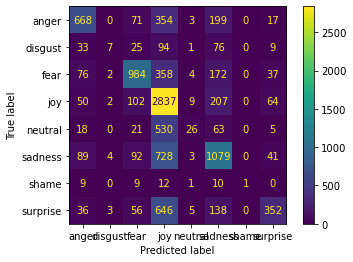

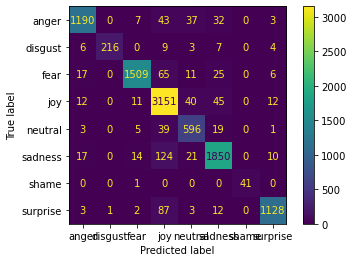

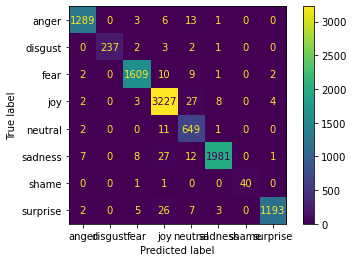

In [40]:
#confusion Matrix for Logistic Regression
plot_confusion_matrix(nv_model,x_test,y_test)
plot_confusion_matrix(lr_model,x_test,y_test)
plot_confusion_matrix(clf,x_test,y_test)

# Interpret Model

In [41]:
import eli5

In [42]:
class_name=ylabels.unique().tolist()
feture_name=cv.get_feature_names()

C:\Users\krisn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
eli5.show_weights(lr_model,feature_names=feture_name,target_names=class_name)